# Régression linéaire : Les iris  

On commence par étudier les corrélations entre les caractéristiques des iris puis pour les deux caractéristiques les plus liées, on va prédire l'une d'elle en fonction de l'autre par un modèle de regression linéaire.

In [1]:
%matplotlib notebook

In [2]:
#On commence par importer nos bibliothèques habituelles
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## 1) Corrélations entre les caractéristiques
Etudier les corrélations entre les différentes caractéristiques des iris, dans le but de déterminer les deux caractéristiques les plus linéairement liées

In [3]:
# On importe les données
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<IPython.core.display.Javascript object>


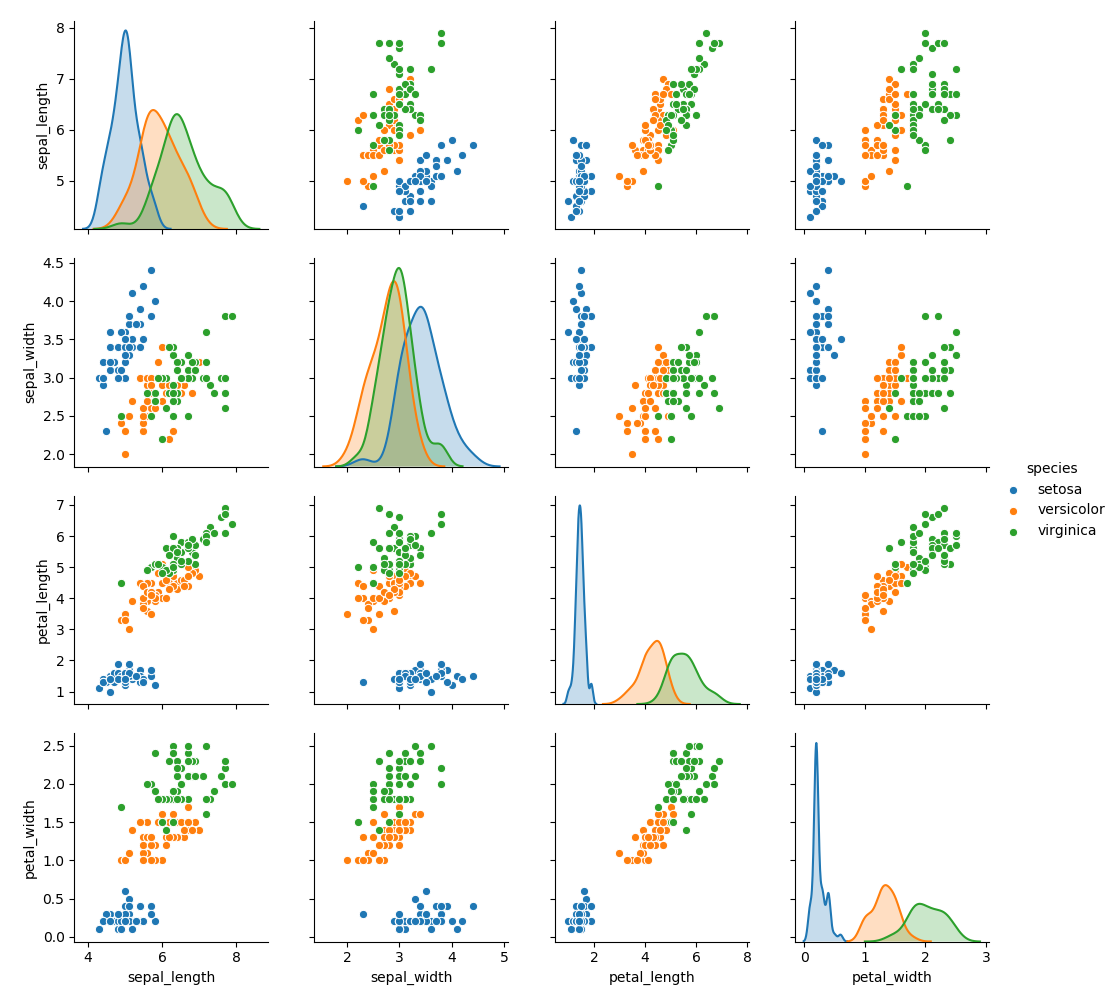

In [4]:
# On représente les données pour se faire une petite idée
sns.pairplot(iris,hue='species')
plt.show()

Calculer, afficher et visualiser la matrice de corrélation : 

<IPython.core.display.Javascript object>


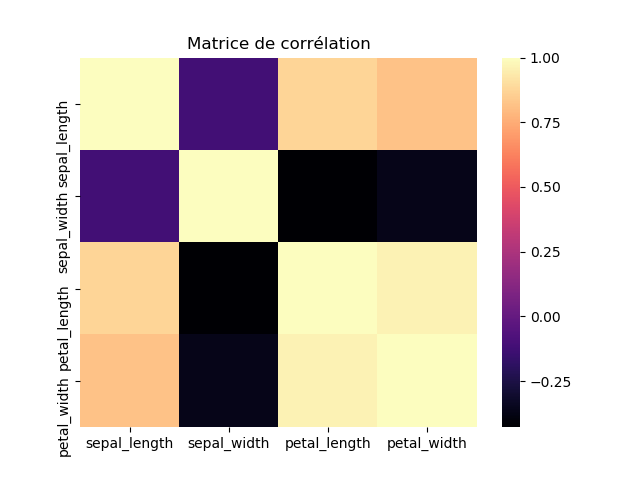

In [5]:
plt.figure()
A=iris.corr()
sns.heatmap(A,cmap=plt.cm.magma)
plt.title("Matrice de corrélation")
plt.show()

In [6]:
print(A)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


In [7]:
from mpl_toolkits.mplot3d import Axes3D

def showXY_3d(Xa,Xt,Ya,Yt,labels,legendes):
    #gauche
    fig=plt.figure(figsize=(10, 4))
    ax1=fig.add_subplot(121,projection='3d') # 3d
    scatter1=ax1.scatter(Xa[:, 0], Xa[:, 1],Ya,c=Xa[:,2])
    plt.legend(handles=scatter1.legend_elements()[0], labels=legendes)
    ax1.set_xlabel(labels[0])
    ax1.set_ylabel(labels[1])
    ax1.set_zlabel(labels[2])
    plt.title("Apprentissage")
    #droite
    ax2=fig.add_subplot(122,projection='3d')
    scatter2=ax2.scatter(Xt[:, 0], Xt[:, 1],Yt,c=Xt[:,2])
    plt.legend(handles=scatter2.legend_elements()[0], labels=legendes)
    ax2.set_xlabel(labels[0])
    ax2.set_ylabel(labels[1])
    ax2.set_zlabel(labels[2])
    plt.title("Test")


On a donc une corrélation maximale de 0.96 entre longueur et largeur des pétales.

<IPython.core.display.Javascript object>


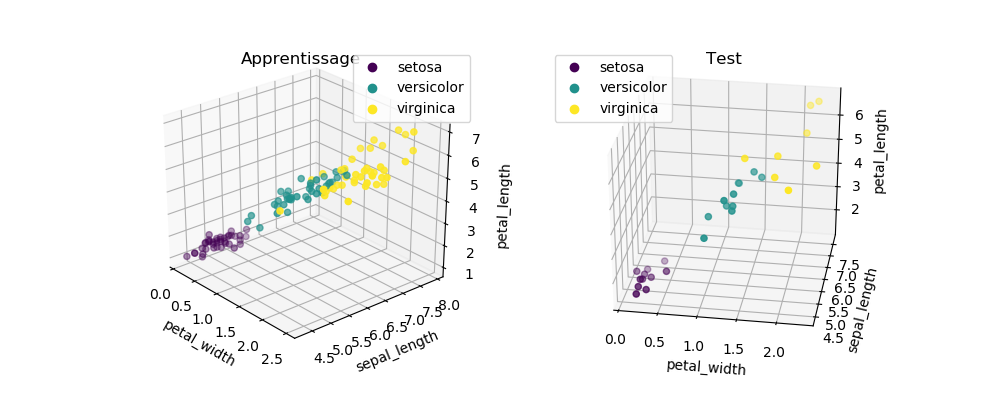

In [8]:
from sklearn.model_selection import train_test_split

#pour garder les especes comme couleurs
iris.loc[iris.species=="setosa",'species']=0
iris.loc[iris.species=="versicolor",'species']=1
iris.loc[iris.species=="virginica",'species']=2


y=np.array(iris['petal_length']).reshape(150,1)
X=np.array([iris['petal_width'],iris['sepal_length'],iris['species']])
X=np.transpose(X)


Xa,Xt,Ya,Yt=train_test_split(X,y, test_size=0.2,shuffle=True)
showXY_3d(Xa,Xt,Ya,Yt,['petal_width','sepal_length','petal_length'],['setosa','versicolor','virginica'])


<IPython.core.display.Javascript object>


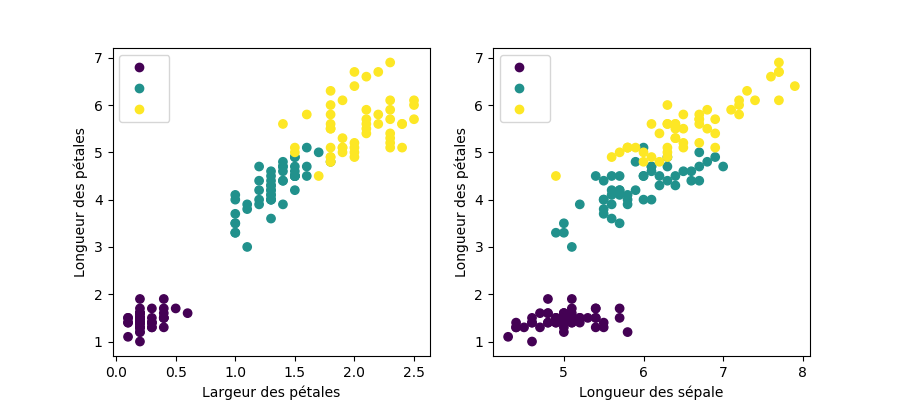

In [17]:
plt.figure(figsize=(9, 4))
# première colonne
plt.subplot(1,2,1)
scatter1=plt.scatter(X[:, 0], y,c=X[:,2],label=['setosa','versicolor','virginica'])
plt.legend(handles=scatter1.legend_elements()[0])
plt.ylabel('Longueur des pétales')
plt.xlabel('Largeur des pétales') 
# deuxieme colonne
plt.subplot(1,2,2)
scatter2=plt.scatter(X[:, 1], y,c=X[:,2],label=['setosa','versicolor','virginica'])
plt.legend(handles=scatter2.legend_elements()[0])
plt.ylabel('Longueur des pétales')
plt.xlabel('Longueur des sépale') 
plt.show()

## 2) Modèle de regression linéaire
Définir un modèle de régression linéaire en utilisant  scikit learn

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
Xa,Xt,Ya,Yt=train_test_split(X,y, test_size=0.2,shuffle=True)
reg=LinearRegression()
Xt_color=Xt[:,2].reshape(-1, 1)
Xa_color=Xa[:,2].reshape(-1, 1)

#Largeur pétales
Xa0=Xa[:,0].reshape(-1, 1) #reshape car tout seul
Xt0=Xt[:,0].reshape(-1, 1) #reshape car tout seul
reg.fit(Xa0,Ya)
prediction0=reg.predict(Xt0)
scorea0=reg.score(Xa0,Ya)
scoret0=reg.score(Xt0,Yt)
a0=reg.coef_[0][0]
b0=reg.intercept_[0]

#Longueur sépales
Xt1=Xt[:,1].reshape(-1, 1) #reshape car tout seul
Xa1=Xa[:,1].reshape(-1, 1) #reshape car tout seul
reg=LinearRegression() 
reg.fit(Xa1,Ya)
prediction1=reg.predict(Xt1)
scorea1=reg.score(Xa1,Ya)
scoret1=reg.score(Xt1,Yt)
a1=reg.coef_[0][0]
b1=reg.intercept_[0]


#Les deux en même temps
X2a=Xa[:,:2]
X2t=Xt[:,:2]
reg=LinearRegression()
reg.fit(X2a,Ya)
prediction2=reg.predict(X2t)

coeff_a0,coeff_a1=reg.coef_[0]
b=reg.intercept_[0]

scorea2=reg.score(X2a,Ya)
scoret2=reg.score(X2t,Yt)


## 3) Analyse des performances du modèle
 



In [12]:
'''R^2 = 1 - la somme des erreurs quadratiques avec yt predit / la somme des erreurs quadratiques avec yt moyen'''
def score(Xt,yt,a,b):  #deux variables
    yt_moyen=yt.mean()
    return 1- (np.sum((a*Xt+b-yt)**2)/np.sum((yt_moyen-yt)**2))

def score2(Xt0,Xt1,yt,coef_a0,coef_a1,b): #trois variables
    yt_moyen=yt.mean()
    return 1- (np.sum((coef_a0*Xt0+coef_a1*Xt1+b-yt)**2)/np.sum((yt_moyen-yt)**2))



# Calculer les scores sur les données d'apprentissage et les données de test 
print('-----------------') 
print("Largeur pétales:")
print('-----------------') 
print(f'Score apprentissage : {scorea0}')
print(f'Score test sklearn : {scoret0}')
print(f'Score test calculé : {score(Xt0,Yt,a0,b0)}')
      
print('-----------------')   
print("Longueur sépales:")
print('-----------------') 
print(f'Score apprentissage : {scorea1}')
print(f'Score test sklearn : {scoret1}')
print(f'Score test calculé : {score(Xt1,Yt,a1,b1)}')

print('-----------------')   
print("Avec les deux:")
print('-----------------') 
print(f'Score apprentissage : {scorea2}')
print(f'Score test sklearn : {scoret2}')
print(f'Score test calculé : {score2(Xt0,Xt1,Yt,coeff_a0,coeff_a1,b)}')

-----------------
Largeur pétales:
-----------------
Score apprentissage : 0.9276235776879077
Score test sklearn : 0.9233833050623277
Score test calculé : 0.9233833050623277
-----------------
Longueur sépales:
-----------------
Score apprentissage : 0.7755882860822149
Score test sklearn : 0.6833232516939215
Score test calculé : 0.6833232516939215
-----------------
Avec les deux:
-----------------
Score apprentissage : 0.9495058993657598
Score test sklearn : 0.9428602421574689
Score test calculé : 0.9428602421574689


<IPython.core.display.Javascript object>


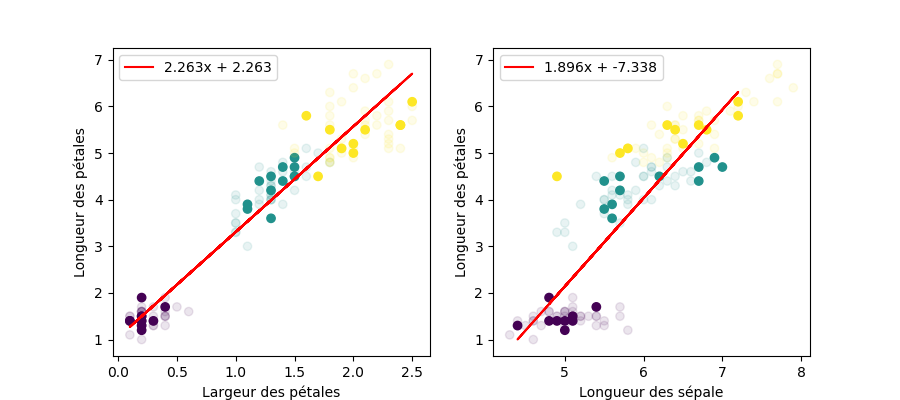

In [13]:
# Le score est très acceptable, donc...
# Utiliser les prédictions sur des données de test et les représenter graphiquement
plt.figure(figsize=(9, 4))

#Longueur pétales
plt.subplot(1,2,1)
scatter1=plt.scatter(Xt0, Yt,c=Xt_color)
plt.scatter(Xa0, Ya,c=Xa_color,alpha=0.1)
plt.plot(Xt0,prediction0,c='red',label=f'{round(a0,3)}x + {round(a0,3)}')
plt.legend()
plt.ylabel('Longueur des pétales')
plt.xlabel('Largeur des pétales') 

#Longueur sépales
plt.subplot(1,2,2)
scatter2=plt.scatter(Xt1, Yt,c=Xt_color)
plt.scatter(Xa1, Ya,c=Xa_color,alpha=0.1)
plt.plot(Xt[:,1],prediction1,c='red',label=f'{round(a1,3)}x + {round(b1,3)}')
plt.legend()
plt.ylabel('Longueur des pétales')
plt.xlabel('Longueur des sépale') 
plt.show()

<IPython.core.display.Javascript object>


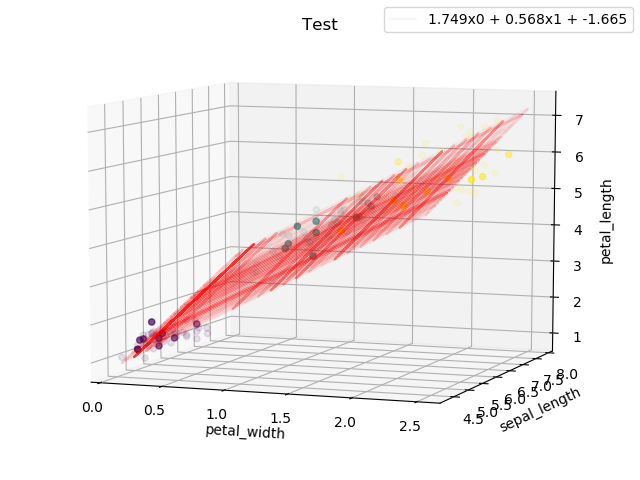

In [14]:
def showPrediction3D(Xa,Xt,Ya,Yt,labels,legendes):
    fig=plt.figure()
    ax=Axes3D(fig)
    scatter1=ax.scatter(Xt[:, 0], Xt[:, 1],Yt,c=Xt[:,2])
    ax.scatter(Xa[:, 0], Xa[:, 1],Ya,c=Xa[:,2],alpha=0.1)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    plt.title("Regression 2 variables")
    A=Xa[:,0]
    B=Xa[:,1]
    A,B=np.meshgrid(A,B)
    prediction= A*coeff_a0+B*coeff_a1+b
    surf = ax.plot_wireframe(A,B,prediction, rstride=1, 
        cstride=1,alpha=0.05,color='red',label=f'{round(coeff_a0,3)}x0 + {round(coeff_a1,3)}x1 + {round(b,3)}')
    plt.legend() 
    
    
showPrediction3D(Xa,Xt,Ya,Yt,['petal_width','sepal_length','petal_length'],['setosa','versicolor','virginica'])
